# Deep learning with fast.ai cookbook - MNIST "hello world" example
Minimal example using the MNIST dataset to demonstrate a minimimal, "hello world" type fast.ai application.

Here are the built-in choices for MNIST:
- MNIST_SAMPLE        = f'{URL}mnist_sample.tgz' # 3s and 7s only
- MNIST_TINY          = f'{URL}mnist_tiny.tgz' # 3s and 7s only
- MNIST_VAR_SIZE_TINY = f'{S3_IMAGE}mnist_var_size_tiny.tgz' #3s and 7s only
- MNIST               = f'{S3_IMAGE}mnist_png.tgz'

Here is the directory structure for these datasets:

mnist_png:
testing  training

mnist_sample:
labels.csv  train  valid

mnist_tiny:
labels.csv  models  test  train  valid

mnist_var_size_tiny:
labels.csv  models  process.txt  test  train  valid

We are going to use MNIST for this example

In [107]:
# imports for notebook boilerplate
!pip install -Uqq fastbook
import fastbook
from fastbook import *
from fastai.vision.all import *
from IPython.display import display,HTML


In [108]:
# set up the notebook for fast.ai
fastbook.setup_book()

In [109]:
# In Gradient, datasets get saved in /storage/data when untar_data is called 
# if the dataset has not been copied there already
path = untar_data(URLs.MNIST)

In [110]:
# examine the directory structure of the dataset
path.ls()

(#2) [Path('/storage/data/mnist_png/training'),Path('/storage/data/mnist_png/testing')]

In [111]:
# create an image dataloaders object using the path
# note that because of the directory structure of the dataset 
# the train and valid sets have to be explicitly specified
# details here: https://github.com/fastai/fastai/issues/1129
dls = ImageDataLoaders.from_folder(path, train='training', valid='testing')
# create a learner object using the dataloaders that was just defined
# architecture is resnet18; see https://pytorch.org/hub/pytorch_vision_resnet/
# loss function is selected for multi class classification
# accuracy is the metric used to optimize
learn = cnn_learner(dls, resnet18, pretrained=False,
                    loss_func=LabelSmoothingCrossEntropy(), metrics=accuracy)
# fit the model for one epoch using 1cycle policy
# see https://docs.fast.ai/callback.schedule.html#Learner.fit_one_cycle
learn.fit_one_cycle(1, 0.1)



epoch,train_loss,valid_loss,accuracy,time
0,0.565093,0.526083,0.989400,00:51


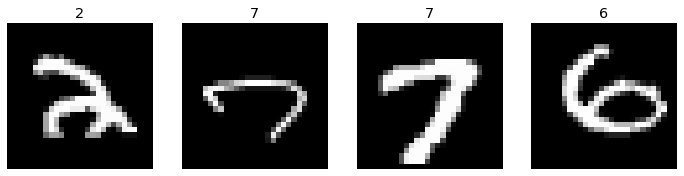

In [112]:
# show a batch of training data
dls.train.show_batch(max_n=4, nrows=1)


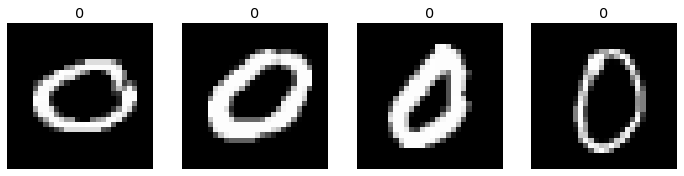

In [113]:
# show a batch of validation data
dls.valid.show_batch(max_n=4, nrows=1)

In [114]:
# take a look at one of the test images
dest = '/notebooks/storage/data/mnist_png/testing/7/9979.png'
im = Image.open(dest)
im.to_thumb(128,128)


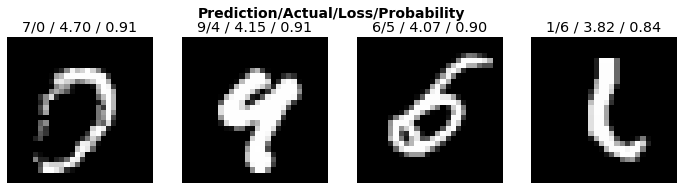

In [115]:
# show the images with the highest loss
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_top_losses(4, nrows=1)


In [116]:
# examine the model, including its layers
learn.summary()

Sequential (Input shape: ['64 x 3 x 28 x 28'])
Layer (type)         Output Shape         Param #    Trainable 
Conv2d               64 x 64 x 14 x 14    9,408      True      
________________________________________________________________
BatchNorm2d          64 x 64 x 14 x 14    128        True      
________________________________________________________________
ReLU                 64 x 64 x 14 x 14    0          False     
________________________________________________________________
MaxPool2d            64 x 64 x 7 x 7      0          False     
________________________________________________________________
Conv2d               64 x 64 x 7 x 7      36,864     True      
________________________________________________________________
BatchNorm2d          64 x 64 x 7 x 7      128        True      
________________________________________________________________
ReLU                 64 x 64 x 7 x 7      0          False     
___________________________________________________

In [117]:
# select an image from the test set
img_files = get_image_files(path/"testing")
img = PILImage.create(img_files[0])
img

In [118]:
# apply the trained model to the image
learn.predict(img)

('0',
 TensorImage(0),
 TensorImage([0.9228, 0.0082, 0.0092, 0.0070, 0.0069, 0.0085, 0.0094, 0.0082, 0.0081, 0.0118]))

In [119]:
# select a different test set image and apply the model to it to get a prediction
img = PILImage.create(img_files[2030])
img

In [120]:
learn.predict(img)

('9',
 TensorImage(9),
 TensorImage([0.0093, 0.0107, 0.0085, 0.0130, 0.0091, 0.0086, 0.0088, 0.0113, 0.0074, 0.9132]))

In [121]:
# select a different image and apply the model to it to get a prediction
img = PILImage.create(img_files[5800])
img

In [122]:
learn.predict(img)

('1',
 TensorImage(1),
 TensorImage([0.0098, 0.9211, 0.0120, 0.0086, 0.0063, 0.0089, 0.0093, 0.0068, 0.0083, 0.0090]))